# El secreto del centro galáctico

La ESA nos ha proporcionado los siguientes datos. Se refieren a estrellas que orbitan el centro galáctico. 

Los periodos se dan en años y el semieje mayor de la óribita en UA (unidades astronómicas)

In [1]:
datos = {'estrella': ['S1','S2','S8','S12','S13','S14'], 
         'periodo': [94.1, 15.24,67.2,54.4,36,38], 
         'distancia_media': [3300,980,2630,2290,1750,1800]}

In [2]:
datos['estrella']

['S1', 'S2', 'S8', 'S12', 'S13', 'S14']

In [3]:
datos['periodo']

[94.1, 15.24, 67.2, 54.4, 36, 38]

In [4]:
datos['distancia_media']

[3300, 980, 2630, 2290, 1750, 1800]

Conocidos el periodo y la distancia media de la órbita, podemos calcular la masa del objeto central a partir de la tercera ley de Kepler.

## 1. Convertir las unidades al SI

Definimos dos funciones que conviertan las unidades de los datos que nos ha proporcionado la ESA al SI

In [5]:
def year2second(time_year):
    """Función que convierte unidades de tiempo de años a segundos"""
    time_s = time_year*(365*24*3600)
    return time_s


# La unidad astronómica (abreviada ua, au, UA o AU) es una unidad de longitud igual, por definición, a 149 597 870 700 m, 
# que equivale aproximadamente a la distancia media entre la Tierra y el Sol.

def UA2m(distance_UA):
    """función que convierte unidades de distancia de UA a metros"""
    dist_m = distance_UA*149597870700
    return dist_m
    

## 2. Representa gráficamente el periodo frente al semieje mayor

Lo primero que haremos será crear dos listas que contengan el periodo orbital y el radio medio de la órbita en el SI.

In [6]:
periodo_orbital = []
for i in datos['periodo']:
    periodo_orbital.append(year2second(i))

print(periodo_orbital)

[2967537600.0, 480608640.0, 2119219200.0, 1715558400.0, 1135296000, 1198368000]


In [7]:
radio_orbital = []
for i in range(len(datos['distancia_media'])):
    radio_orbital.append(UA2m(datos['distancia_media'][i]))
    
print(radio_orbital)

[493672973310000, 146605913286000, 393442399941000, 342579123903000, 261796273725000, 269276167260000]


## 3. ¿Hay un objeto con masa en el centro de la galaxia?
##                   Comprobad la tercera key de Kepler

Necesitamos listas que contengan semieje mayor al cubo y periodos al cuadrado

In [8]:
R3 = []
for i in radio_orbital:
    R3.append(float(i**3))

T2 = []
for i in periodo_orbital:
    T2.append(float(i**2))

Ahora vamos a representar gráficamente dichos puntos

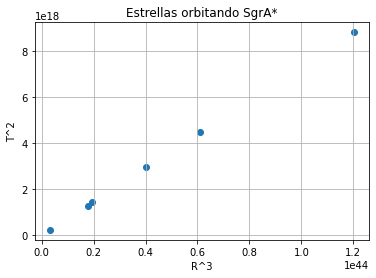

In [9]:
from matplotlib import pylab as plt

plt.scatter(R3,T2)
plt.title('Estrellas orbitando SgrA*')
plt.xlabel('R^3')
plt.ylabel('T^2')
plt.grid()

## 4. Obtener la masa del agujero negro central




No es necesario saber hacer una regresión lineal... Podemos calcular el resultado que obtendríamos para cada estrella aplicando la tercera ley de Kepler, y hacer la media de todos los resultados para obtener un mejor resultado estadístico.

In [10]:
import numpy as np
from scipy.constants import G

In [11]:
M_agujero_negro = []

for i in range(len(R3)):
    M_agujero_negro.append(4*np.pi**2*R3[i]/(T2[i]*G))
    
M_BH=sum(M_agujero_negro)/len(M_agujero_negro)
print(M_BH)

8.088051651284576e+36


¿Cúanto vale la masa en unidades de masas solares?

In [12]:
M_Sun = 1.98840987e+30

print(M_BH/M_Sun)

4067597.819399567


### ¿Coinciden tus resultados con el de lxs investigadorxs?
Se puede comprobar el resultado y aprender más en el artículo original: https://arxiv.org/abs/astro-ph/0210426

## Adicional: Regresión lineal.


In [13]:
x = np.array(R3)
y = np.array(T2)

In [14]:
p = np.polyfit(x, y, 1)
print(p)

[ 7.33061027e-26 -2.13838394e+15]


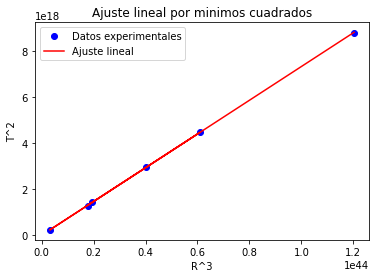

In [15]:
# Valores de y calculados del ajuste
y_ajuste = p[0]*x + p[1]

# Dibujamos los datos experimentales
p_datos, = plt.plot(x, y, 'bo')
# Dibujamos la recta de ajuste
p_ajuste, = plt.plot(x, y_ajuste, 'r-')

plt.title('Ajuste lineal por minimos cuadrados')

plt.xlabel('R^3')
plt.ylabel('T^2')

plt.legend(('Datos experimentales', 'Ajuste lineal'), loc="upper left")
plt.show()

In [16]:
M=4*np.pi**2/(G*p[0])
M

8.068891620330759e+36